<a href="https://colab.research.google.com/github/MadhusudhanReddy717/RecommendationSystems/blob/main/Recommendation%20Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

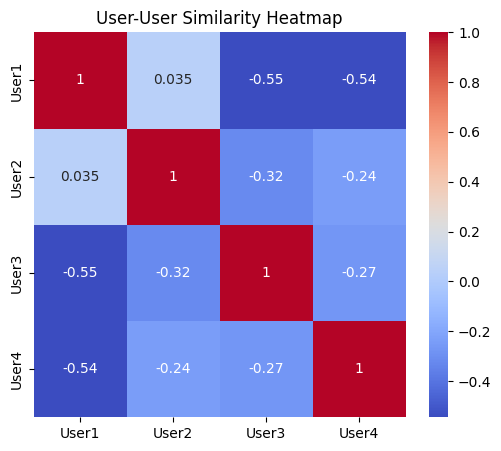

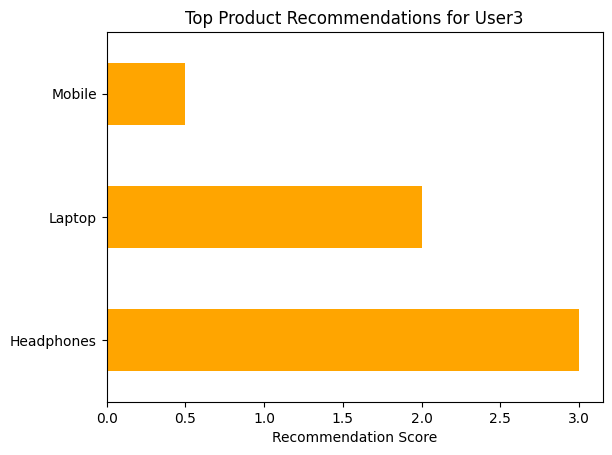

In [2]:
# ✅ Personalized Product Recommendation System using Collaborative Filtering

# 📌 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# 📌 Step 2: Sample User-Item Ratings Matrix
data = {
    'Laptop': [5, 3, 0, 1],
    'Mobile': [4, 0, 0, 1],
    'Headphones': [1, 1, 0, 5],
    'Charger': [0, 1, 5, 4],
    'Camera': [2, 1, 3, 0]
}
df = pd.DataFrame(data, index=['User1', 'User2', 'User3', 'User4'])

# 📌 Step 3: Normalize Data to Reduce Bias
scaler = StandardScaler(with_mean=True)
normalized_df = pd.DataFrame(scaler.fit_transform(df.fillna(0)), columns=df.columns, index=df.index)

# 📌 Step 4: Compute User-User Cosine Similarity
user_similarity = cosine_similarity(normalized_df)
user_sim_df = pd.DataFrame(user_similarity, index=df.index, columns=df.index)

# 📊 Step 5: Visualize User Similarity Matrix
plt.figure(figsize=(6,5))
sns.heatmap(user_sim_df, annot=True, cmap="coolwarm")
plt.title("User-User Similarity Heatmap")
plt.show()

# 📌 Step 6: Define Recommendation Function
def recommend_products(user, df, similarity_matrix, top_n=2):
    user_idx = df.index.tolist().index(user)
    sim_scores = similarity_matrix[user_idx]
    scores_df = pd.DataFrame({'User': df.index, 'Similarity': sim_scores})
    scores_df = scores_df.sort_values(by='Similarity', ascending=False)

    # Get top similar users (excluding the target user)
    top_users = scores_df['User'].iloc[1:top_n+1]

    # Aggregate preferences of similar users
    recommendations = df.loc[top_users].mean()

    # Recommend items the target user hasn't rated
    user_rated = df.loc[user]
    unseen_products = user_rated[user_rated == 0].index
    suggested = recommendations[unseen_products].sort_values(ascending=False)

    return suggested.head(3)

# 📌 Step 7: Recommend for a Specific User
target_user = 'User3'
recommendations = recommend_products(target_user, df, user_similarity)

# 📊 Step 8: Visualize Top Recommendations
recommendations.plot(kind='barh', color='orange')
plt.title(f"Top Product Recommendations for {target_user}")
plt.xlabel("Recommendation Score")
plt.show()
